# Diabetes Prediction

## Importing Libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Load the dataset

In [3]:
df_sayeed = pd.read_csv("diabetes.csv")

In [4]:
df_sayeed.shape

(768, 11)

In [5]:
# View sample
df_sayeed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10
0,6,148,72,35,0,33.6,0.627,50,1,NaN,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN,NaN


In [6]:
# basic statistics of data
df_sayeed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,0.0,0.0
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,NaN,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,NaN,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,NaN,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,NaN,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,NaN,NaN
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,NaN,NaN


In [7]:
df = df_sayeed

## Feature Engineering

## 1.Splitting data into training & test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']], df['Outcome'], random_state=0)

## 2. Standardize the data

Sklearn's StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance

In [9]:
scaler = StandardScaler()

In [10]:
# Fit on training set only.
scaler.fit(X_train)

StandardScaler()

In [11]:
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

Defining our own parameter dictionary

1. Max_iter - Maximum number of iterations taken for the solvers to converge.

2. Penalty - Specify the norm of the penalty 'none': no penalty is added; 'l2': add a L2 penalty term and it is the default choice; 'l1': add a L1 penalty term;

In [12]:
lr = LogisticRegression()
parameters = {
     'max_iter' : [100, 1000,2500],
     'penalty' : ['none','l1','l2']
}

Now

- Call gridSearchCV, and pass in our model object (lr)
- Specify how many folds we want to do with cross validation (3)

In [13]:
cv1 = GridSearchCV(lr, parameters, cv=3)

In [14]:
cv1.fit(X_train, y_train)

#print_results(cv)

C:\Users\Sayeed97\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
9 fits failed out of a total of 27.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sayeed97\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sayeed97\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Sayeed97\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueE

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 1000, 2500],
                         'penalty': ['none', 'l1', 'l2']})

### Printing best model

In [15]:
cv1.best_estimator_

LogisticRegression()

In [16]:
y_pred1 = cv1.predict(X_test)

### Measuring model performance

### 1. Accuracy

In [17]:
score = cv1.score(X_test, y_test)
print("Accuracy:" ,score)

Accuracy: 0.8020833333333334


### 2. Precision

In [20]:
metrics.precision_score(y_test, y_pred1, average='binary')

0.75

### 3. Recall

In [21]:
metrics.recall_score(y_test, y_pred1)

0.5806451612903226

### 4. F1-Score

In [23]:
metrics.f1_score(y_test, y_pred1)

0.6545454545454547

### 5. Support

In [25]:
metrics.precision_recall_fscore_support(y_test, y_pred1,average='binary')

(0.75, 0.5806451612903226, 0.6545454545454547, None)

### Confusion matrix - Logistic Regression

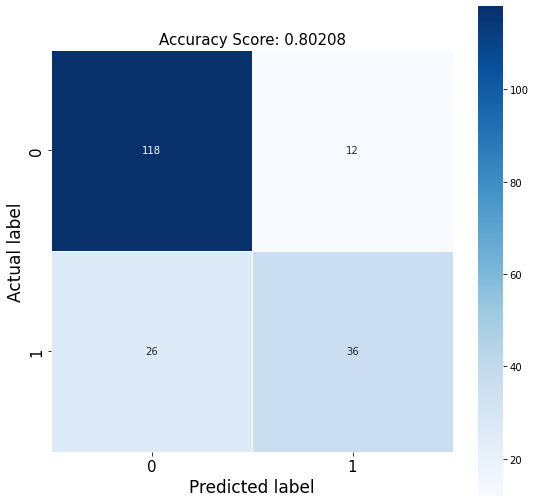

In [29]:
cm = metrics.confusion_matrix(y_test, cv1.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(round(score,5)), size = 15);
plt.tick_params(labelsize= 15)

## II. Decision Trees

Loading Decision tree library and specify model parameters

In [30]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [31]:
# Fitting our model and getting accuracy
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print(score)

0.75


### Finding the Optimal max_depth

In [32]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))

# List to store the average RMSE for each value of max_depth:
accuracy = []

In [33]:
for depth in max_depth_range:

    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)

    score = clf.score(X_test, y_test)
    accuracy.append(score)

accuracy

[0.75, 0.75, 0.734375, 0.7395833333333334, 0.7760416666666666]

### Fitting our classifier to best depth

In [34]:
lf = DecisionTreeClassifier(max_depth = 5, 
                             random_state = 0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [36]:
y_pred2 = clf.predict(X_test)

### Measuring model performance

### 1. Accuracy

In [43]:
score = clf.score(X_test, y_test)
print("Accuracy:" ,score)

Accuracy: 0.7760416666666666


### 2. Precision

In [44]:
metrics.precision_score(y_test, y_pred2, average='binary')

0.6862745098039216

### 3. Recall

In [45]:
metrics.recall_score(y_test, y_pred2)

0.5645161290322581

### 4. F1-Score

In [46]:
metrics.f1_score(y_test, y_pred2)

0.6194690265486725

### 5. Support

In [47]:
metrics.precision_recall_fscore_support(y_test, y_pred2,average='binary')

(0.6862745098039216, 0.5645161290322581, 0.6194690265486725, None)

### Confusion matrix - Logistic Regression

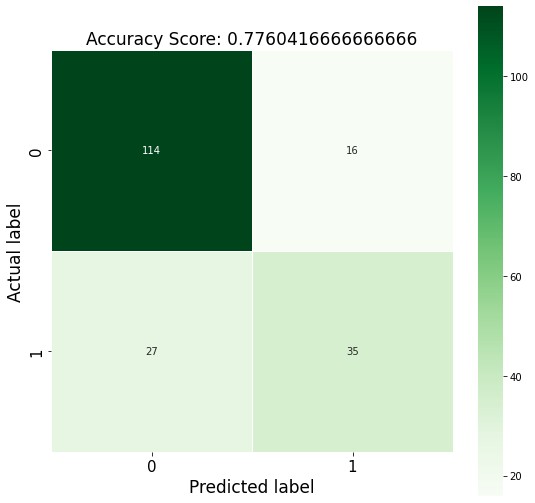

In [48]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Greens');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

## SVM

Loading SVM libraries and specify model parameters

In [49]:
# Import libraries
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

### Hyperparameter Tuning

In [50]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### Fitting model to optimal parameters

In [51]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

svc = GridSearchCV(svc, parameters, cv=5)
svc.fit(X_train, y_train)

print_results(svc)

BEST PARAMS: {'C': 10, 'kernel': 'linear'}

0.757 (+/-0.064) for {'C': 0.1, 'kernel': 'linear'}
0.715 (+/-0.048) for {'C': 0.1, 'kernel': 'rbf'}
0.757 (+/-0.059) for {'C': 1, 'kernel': 'linear'}
0.75 (+/-0.055) for {'C': 1, 'kernel': 'rbf'}
0.759 (+/-0.059) for {'C': 10, 'kernel': 'linear'}
0.714 (+/-0.054) for {'C': 10, 'kernel': 'rbf'}


In [53]:
y_pred3 = svc.predict(X_test)

### Measuring model performance

### 1. Accuracy

In [54]:
score = svc.score(X_test, y_test)
print("Accuracy:" ,score)

Accuracy: 0.8072916666666666


### 2. Precision

In [55]:
metrics.precision_score(y_test, y_pred3, average='binary')

0.7551020408163265

### 3. Recall

In [56]:
metrics.recall_score(y_test, y_pred3)

0.5967741935483871

### 4. F1-Score

In [57]:
metrics.f1_score(y_test, y_pred3)

0.6666666666666666

### 5. Support

In [58]:
metrics.precision_recall_fscore_support(y_test, y_pred3,average='binary')

(0.7551020408163265, 0.5967741935483871, 0.6666666666666666, None)

### Confusion matrix - Logistic Regression

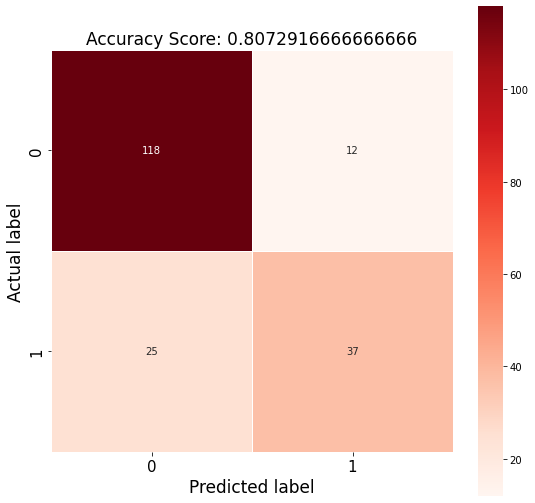

In [59]:
cm = metrics.confusion_matrix(y_test, svc.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Reds');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)